In [1]:
from astropy.io import fits
import numpy 
import xspec
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize Lightcurve Data

In [2]:
lc_file = 'AL1_SOLEXS_20240212/L1/SDD2/AL1_SOLEXS_20240212_SDD2_L1.lc.gz'
hdu_lc = fits.open(lc_file)
lc_data = hdu_lc[2].data
counts_lc = lc_data['COUNTS_ALL']

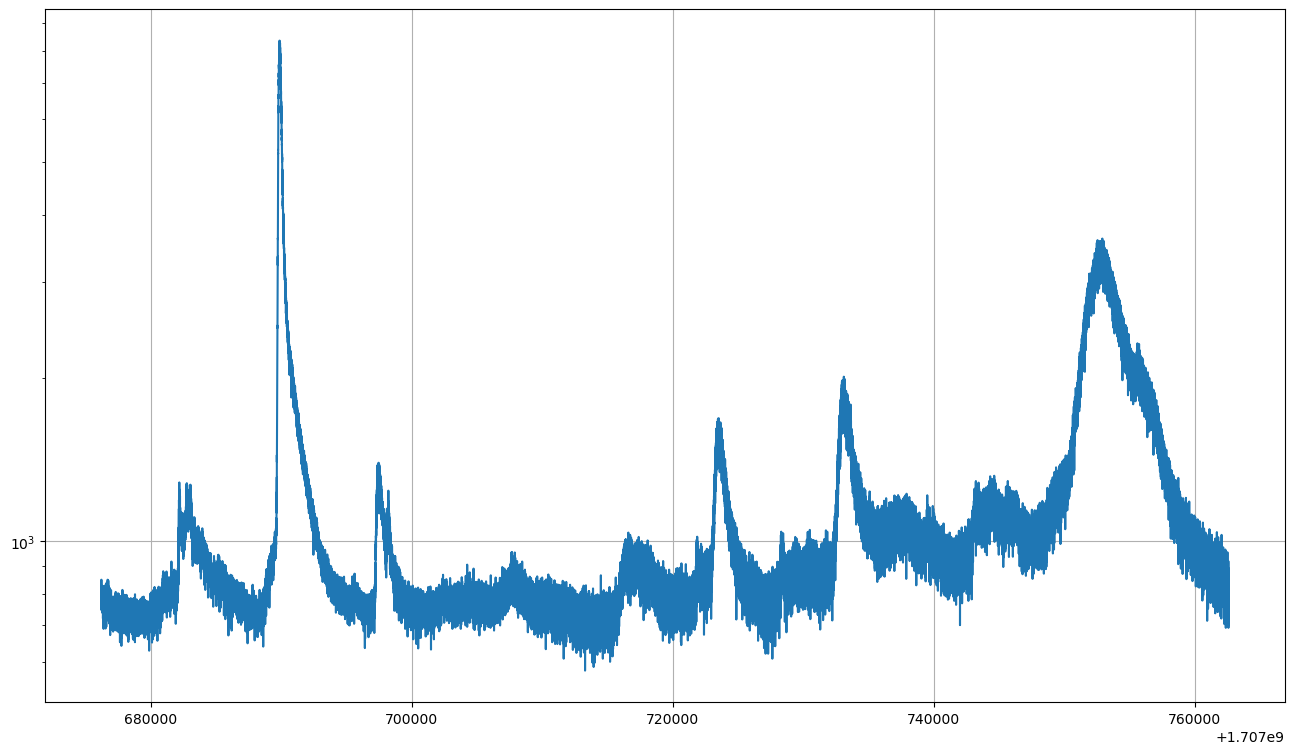

In [3]:
fig, ax = plt.subplots()

fig.set_size_inches(16,9)

ax.semilogy(lc_data['TIME'],counts_lc,label='1 second')
ax.grid()

## Flare Peak Time Interval

(1707689200.0, 1707691200.0)

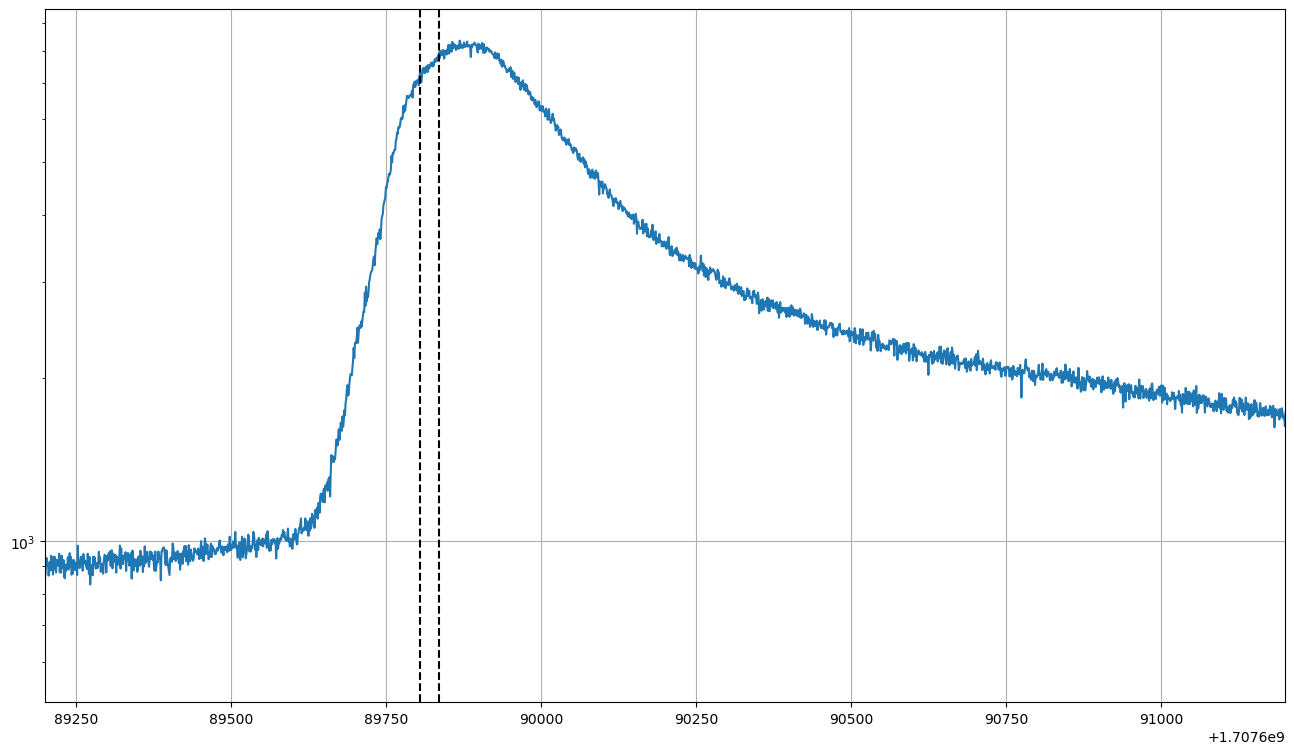

In [4]:
fig, ax = plt.subplots()

fig.set_size_inches(16,9)

ax.semilogy(lc_data['TIME'],counts_lc,label='1 second')
ax.axvline(lc_data['TIME'][13605],color='k',ls='--')
ax.axvline(lc_data['TIME'][13635],color='k',ls='--')
ax.grid()

ax.set_xlim([lc_data['TIME'][13000],lc_data['TIME'][15000]])

## Generating SoLEXS Spectrum Corresponding to Flare Peak

In [5]:
!solexs-genspec -i AL1_SOLEXS_20240212/L1/SDD2/AL1_SOLEXS_20240212_SDD2_L1.pi.gz -tstart 1707689805 -tstop 1707689835 -gti AL1_SOLEXS_20240212/L1/SDD2/AL1_SOLEXS_20240212_SDD2_L1.gti.gz

Start Time: 2024-02-12T03:46:45
Stop Time: 2024-02-12T03:47:15
ARF: /home/rwitika/abhilash/to_test/solexs_tools-0.3/CALDB/aditya-l1/solexs/data/cpf/arf/solexs_arf_SDD2.fits
RMF: /home/rwitika/abhilash/to_test/solexs_tools-0.3/CALDB/aditya-l1/solexs/data/cpf/response/rmf/solexs_gaussian_SDD2_512.rmf
Output written to AL1_SOLEXS_20240212_SDD2_L1_034645_034715.pi.


# Spectral Fitting (Single Temperature)

In [6]:
xspec.AllModels.lmod('chspec',dirPath='/home/rwitika/abhilash/chspec-main/')

Model package chspec successfully loaded.


In [7]:
xspec.AllData.clear()
xspec.AllModels.clear()

In [8]:
specfile = 'AL1_SOLEXS_20240212_SDD2_L1_034645_034715.pi'

In [9]:
spec = xspec.Spectrum(specfile)


1 spectrum  in use
 
Spectral Data File: AL1_SOLEXS_20240212_SDD2_L1_034645_034715.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.752e+03 +/- 1.385e+01
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-340
  Telescope: AL1 Instrument: SoLEXS  Channel Type: PI
  Exposure Time: 30 sec
 Using fit statistic: chi
 Using Response (RMF) File            /home/rwitika/abhilash/to_test/solexs_tools-0.3/CALDB/aditya-l1/solexs/data/cpf/response/rmf/solexs_gaussian_SDD2_512.rmf for Source 1
 Using Auxiliary Response (ARF) File  /home/rwitika/abhilash/to_test/solexs_tools-0.3/CALDB/aditya-l1/solexs/data/cpf/arf/solexs_arf_SDD2.fits



In [10]:
xspec.AllModels.systematic = 0.04 # set systematic error to be 4%


 The default systematic error for models is set to 0.04



In [11]:
xspec.Plot.device = '/xw'
xspec.Plot.xAxis = 'keV'

In [12]:
spec.ignore("**-2.8 12.0-**")  # Fit energy range 2.8 to 12 keV

    58 channels (1-58) ignored in spectrum #     1
   131 channels (210-340) ignored in spectrum #     1



In [13]:
model = xspec.Model("chisoth")


Model chisoth<1> Source No.: 1   Active/On
Model fractional systematic error = 0.04
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
   4    1   chisoth    Be                  1.94000      frozen
   5    1   chisoth    B                   3.09000      frozen
   6    1   chisoth    C                   8.59000      frozen
   7    1   chisoth    N                   8.00000      frozen
   8    1   chisoth    O                   8.89000      frozen
   9    1   chisoth    F                   4.56000      frozen
  10    1   chisoth    Ne                  8.08000      frozen
  11    1   chisoth    Na                  6.93000      frozen
  12    1   chisoth    Mg                  8.15000      frozen
  13    1   chisoth    Al                  7.04000      frozen
  14    1   chisoth    S

In [14]:
model(1).values=[7] #Temperature initial guess

#Thaw adundances
model(18).frozen = False # Ar Abundance
model(20).frozen = False # Ca Abundance
model(26).frozen = False # Fe Abundance
model(28).frozen = False # Ni Abundance


Fit statistic  : Chi-Squared                57919.78     using 151 bins.

Test statistic : Chi-Squared                57919.78     using 151 bins.
 Null hypothesis probability of 0.00e+00 with 149 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                57919.78     using 151 bins.

Test statistic : Chi-Squared                57919.78     using 151 bins.
 Null hypothesis probability of 0.00e+00 with 148 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                57919.78     using 151 bins.

Test statistic : Chi-Squared                57919.78     using 151 bins.
 Null hypothesis probability of 0.00e+00 with 147 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                57919.78     using 151 bins.

Test statistic : Chi-Squared                57919.78     using 151 bins.
 Null hypothesis probability of 0.00e+00 with 146 degrees of freedom
 Current data and mod

In [16]:
xspec.Fit.perform()

                                   Parameters
Chi-Squared  |beta|/N    Lvl        1:logT         18:Ar         20:Ca         26:Fe         28:Ni       31:norm
4248.23      7196.84      -2       7.19867       6.00229       6.48474       8.30543       6.49107       977.577
2867.85      6314.84      -3       7.26461       6.24270       6.61216       7.82273       8.38023       1182.02
500.047      7235.15       0       7.23625       6.74289       6.82640       7.90593       8.03824       1191.21
367.404      353.726      -1       7.23663       6.57887       6.80041       7.94085       7.84033       1287.15
337.437      46.8659      -2       7.24782       6.48655       6.73242       7.86810       7.48615       1365.69
329.639      274.056      -3       7.25189       6.50615       6.73495       7.85914       7.39377       1333.05
329.639      3.12718      10       7.25189       6.50615       6.73495       7.85914       7.39377       1333.05
 Variances and Principal Axes
                 1  

In [17]:
chisq = xspec.Fit.statistic # Total chi-square value
dof = xspec.Fit.dof # Degrees of freedom
red_chi = chisq / dof # Reduced chi-square
print(f'Reduced chi square = {red_chi}')

Reduced chi square = 2.2733753969656636


In [19]:
xspec.Plot("ldata delchi")